In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from sklearn.gaussian_process.kernels import RBF

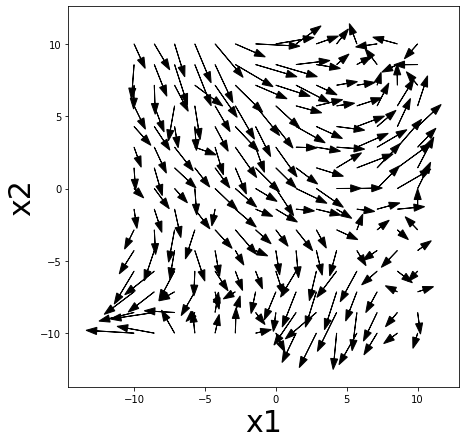

In [58]:
kernel = RBF(length_scale=5)
grid_size = 15
xlimits = [-10, 10]
ylimits = [-10, 10]
x1s = np.linspace(*xlimits, num=grid_size)
x2s = np.linspace(*ylimits, num=grid_size)
X1, X2 = np.meshgrid(x1s, x2s)
X = np.vstack([X1.ravel(), X2.ravel()]).T
n = X.shape[0]


K_XX = kernel(X, X) #* 0.01
g1 = mvn.rvs(X[:, 0], K_XX + 0.1 * np.eye(n))
g2 = mvn.rvs(X[:, 1], K_XX + 0.1 * np.eye(n))
G = np.vstack([g1, g2]).T


plt.figure(figsize=(7, 7))
for ii in range(n):
    plt.arrow(X[ii, 0], X[ii, 1], (G - X)[ii, 0], (G - X)[ii, 1], head_width=0.5, color="black")
plt.xlabel("x1", fontsize=30)
plt.ylabel("x2", fontsize=30)
plt.savefig("/Users/andrewjones/Desktop/warp_vec_field_example.png")
plt.show()

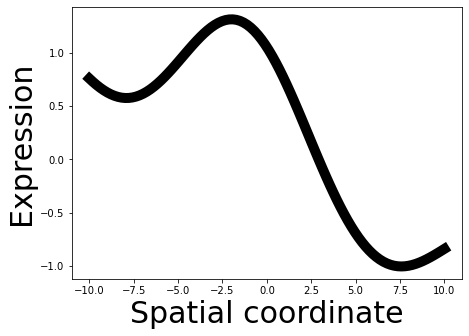

In [67]:
kernel = RBF(length_scale=5)
n = 100
X = np.expand_dims(np.linspace(xlimits[0], xlimits[1], n), 1)


K_XX = kernel(X, X) #* 0.01
Y = mvn.rvs(np.zeros(n), K_XX) # + 0.0001 * np.eye(n))


plt.figure(figsize=(7, 5))
plt.plot(X, Y, color="black", linewidth=10)
plt.xlabel("Spatial coordinate", fontsize=30)
plt.ylabel("Expression", fontsize=30)
plt.savefig("/Users/andrewjones/Desktop/expression_gp_example.png")
plt.show()